The dataset for this BINARY CLASSIFIER to be used is [bc-dataset.csv].
There are 2 implementations here:
1. Bag of words approach.
2. Word vectors (can be pre-trained word embeddings). 

The dataset split is 60-40.
Evaluation metrics to be used in this are:
1. Precision.
2. Recall.
3. F-Measure.

Loads the dataset.

In [22]:
from ftfy import fix_encoding
import pandas as pd
import numpy as np
import re
import csv
import nltk as nlp
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

def fix_encode(x):
    return fix_encoding(x)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv(
    "datasets/bc-dataset.csv",
    encoding="latin1",
    sep=",",
    quoting=csv.QUOTE_ALL
)

data = pd.concat([df.gender, df.description], axis=1)

#drop null rows
data.dropna(axis=0, inplace=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shows some descriptive stats (just for fun).
Also applies ftfy encoding to the ['text'] Column to fix any broken encodings when the .csv file was loaded.

In [23]:
data.description = data.description.apply(lambda x: fix_encode(x))

In [ ]:
# print(df['text'].head(10))##
# print(df['text'].tail(10))##

# print(data.head(15))

In [ ]:
print("Shape: " + str(data.shape))

print("Just some stats.")
print("------")
print(data["gender"].describe())
print("------")
print(data["gender"].value_counts(ascending=True))

Get the rows for each gender ("brand" is labelled under this column).

In [24]:
get_female = data["gender"] == "female"
get_male = data["gender"] == "male"
get_brand = data["gender"] == "brand"

female_rows = data[get_female]
male_rows = data[get_male]
brand_rows = data[get_brand]

print("total female tweets: ",female_rows.description.count())
print("total male tweets:   ",male_rows.description.count())
print("total brand tweets:  ",brand_rows.description.count()) 

total female tweets:  5725
total male tweets:    5469
total brand tweets:   4328


Labelling

In [25]:
female_rows.gender = 0     # female
male_rows.gender = 1       # male
brand_rows.gender = 2      # brand

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
frames = [female_rows, male_rows, brand_rows]
data = pd.concat(frames, ignore_index=True)

In [ ]:
# for testing purposes
data.tail()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15522 entries, 0 to 15521
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       15522 non-null  int64 
 1   description  15522 non-null  object
dtypes: int64(1), object(1)
memory usage: 242.7+ KB


Actual NLP stuff.

In [28]:
lemma = nlp.WordNetLemmatizer()

In [30]:
tweets_list = []            # empty list
for each in data.description:
    each = re.sub("[^a-zA-Z]"," ", str(each))                                        # regex to clean unnecesarry chars
    each = each.lower()                                                              # lowercase all
    each = nlp.word_tokenize(each)                                                   # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]    # delete stop words from your array
    each = [lemma.lemmatize(word) for word in each]                                  # lemmatize "memories" -> "memory"
    each = " ".join(each)                                                            # make them one string again
    tweets_list.append(each)                                                         # put them into big array

In [31]:
print("ORIGINAL: ", data.description.iloc[2174])
print("PREPROCESSED: ", tweets_list[2174])

ORIGINAL:  It's all about you! Live fit, live longer!
PREPROCESSED:  live fit live longer


Bag of Words.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# arbitrary?
max_features = 600

count_vectorizer = CountVectorizer(max_features=max_features, stop_words="english")
space_matrix = count_vectorizer.fit_transform(tweets_list).toarray()
words = count_vectorizer.get_feature_names()

In [33]:
print(words[:100])

['account', 'activist', 'actor', 'addict', 'adult', 'adventure', 'advocate', 'aka', 'alum', 'amazing', 'america', 'american', 'analyst', 'angel', 'animal', 'anime', 'app', 'area', 'arsenal', 'art', 'artist', 'ask', 'aspiring', 'assistant', 'author', 'available', 'award', 'away', 'awesome', 'baby', 'bad', 'band', 'baseball', 'based', 'basketball', 'beat', 'beautiful', 'beauty', 'beer', 'believe', 'best', 'better', 'big', 'bio', 'bit', 'bitch', 'black', 'blessed', 'blog', 'blogger', 'blue', 'body', 'book', 'booking', 'born', 'bot', 'boy', 'brand', 'breaking', 'bring', 'bringing', 'brother', 'building', 'business', 'buy', 'ca', 'called', 'canada', 'canadian', 'car', 'card', 'care', 'cat', 'cause', 'celebrity', 'center', 'ceo', 'certified', 'change', 'channel', 'check', 'chicago', 'chief', 'child', 'christ', 'christian', 'city', 'class', 'club', 'coach', 'coffee', 'college', 'com', 'come', 'comic', 'coming', 'communication', 'community', 'company', 'computer']


# Model

Train-Test Split

In [35]:
y = data.gender.values
X = space_matrix

#Change space_matrix to SPARSE_matrix

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Machine Learning Models.

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# mean accuracy
rfc.score(X_test, y_test)

0.5582219358995008

In [40]:
# y pred
y_head_ml = rfc.predict(X_test)

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_head_ml)

f_measure = f1_score(y_test, y_head_ml, average="weighted")
precision_measure = precision_score(y_test, y_head_ml, average="weighted")
recall_measure = recall_score(y_test, y_head_ml, average="weighted")


In [56]:
print(f_measure)
print(precision_measure)
print(recall_measure)

0.5558060600303413
0.5594622177514742
0.5582219358995008


Matplotlib is building the font cache; this may take a moment.


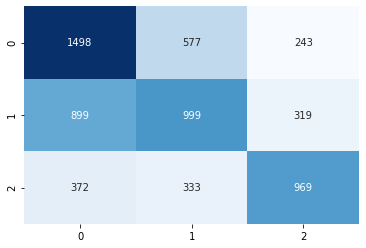

In [47]:
# for confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, cbar=False, annot=True, cmap="Blues", fmt="d")
plt.show()

In [60]:
# for quick and dirty counting
from collections import defaultdict

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer
# function for encoding categories
from sklearn.preprocessing import LabelEncoder

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

f_measure_nb = f1_score(y_test, y_pred_nb, average="weighted")
precision_measure_nb = precision_score(y_test, y_pred_nb, average="weighted")
recall_measure_nb = recall_score(y_test, y_pred_nb, average="weighted")

print("Mean accuracy: ", nb.score(X_test, y_test))
print("F-measure: ", f_measure_nb)
print("Precision: ", precision_measure_nb)
print("Recall: ", recall_measure_nb)


Mean accuracy:  0.5682074408117249
Mean accuracy:  0.5621989137011618
Mean accuracy:  0.5742724246148664
Mean accuracy:  0.5682074408117249


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

f_measure_lr = f1_score(y_test, y_pred_lr, average="weighted")
precision_measure_lr = precision_score(y_test, y_pred_lr, average="weighted")
recall_measure_lr = recall_score(y_test, y_pred_lr, average="weighted")

print("Mean accuracy: ", nb.score(X_test, y_test))
print("F-measure: ", f_measure_lr)
print("Precision: ", precision_measure_lr)
print("Recall: ", recall_measure_lr)

Mean accuracy:  0.5682074408117249
F-measure:  0.5576306269794992
Precision:  0.5717434424577488
Recall:  0.5630536318247705
